<a href="https://colab.research.google.com/github/dilusha-ola/Heart-disease-predictor-AI-model/blob/main/deseasepredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dilushaprabashwara","key":"c5c21771f25ec46b5e64e8e8a4c71e60"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install kaggle

In [4]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 40.3MB/s]


In [5]:
import pandas as pd
df= pd.read_csv('/content/heart-disease/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns]= df[numeric_columns].fillna(df[numeric_columns].mean())

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

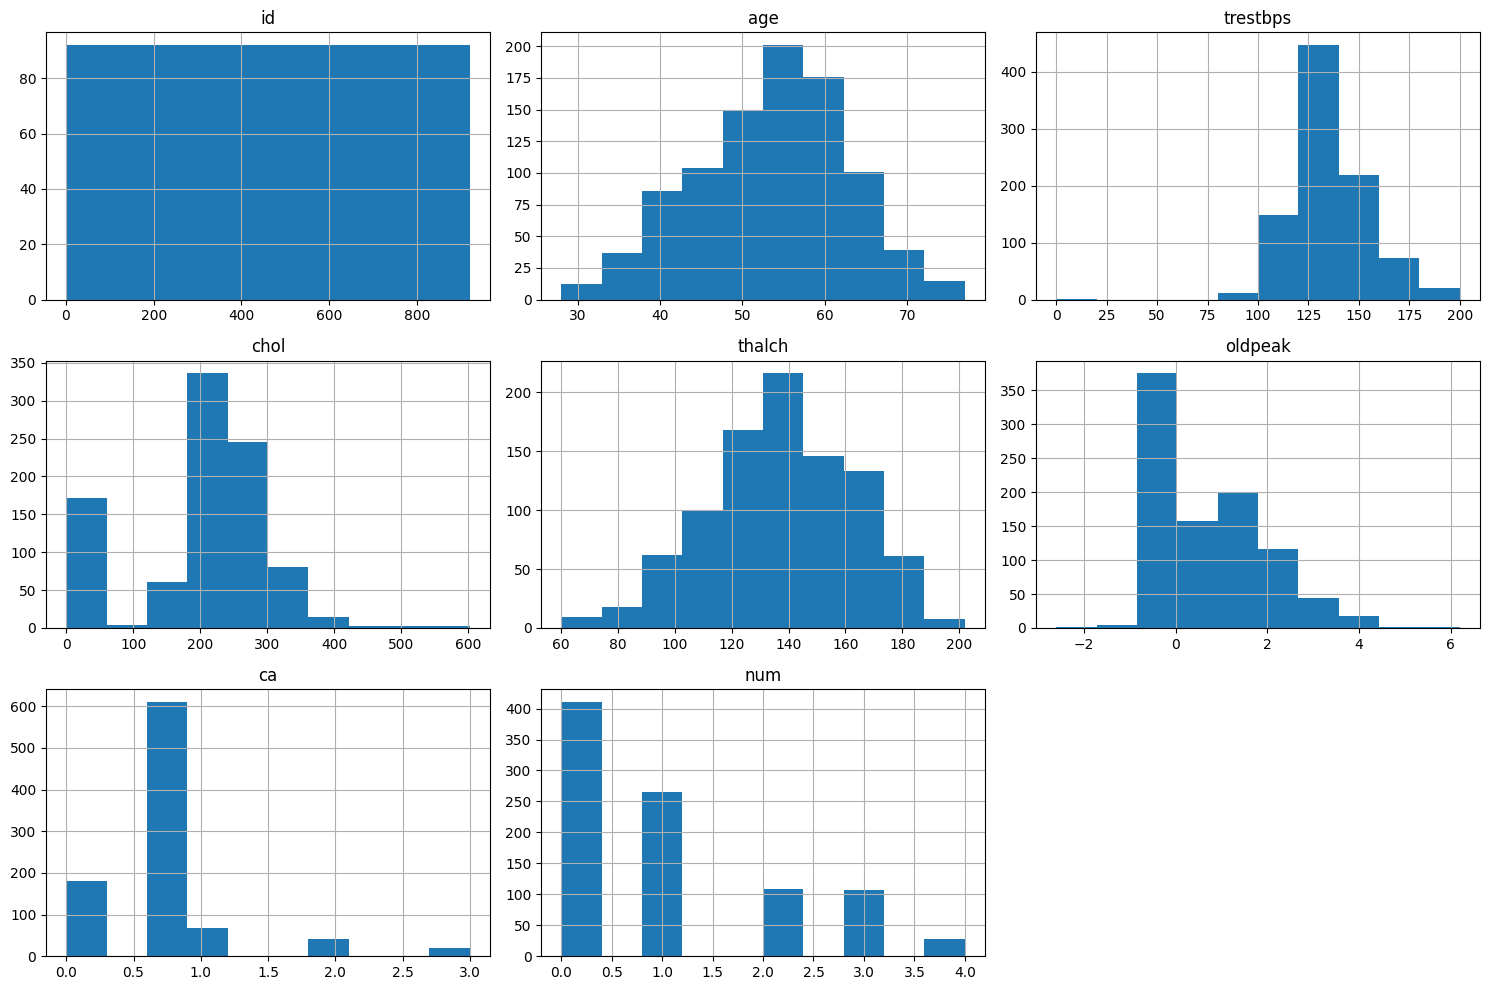

In [8]:
df[numeric_columns].hist(figsize=(15,10))
plt.tight_layout()
plt.show

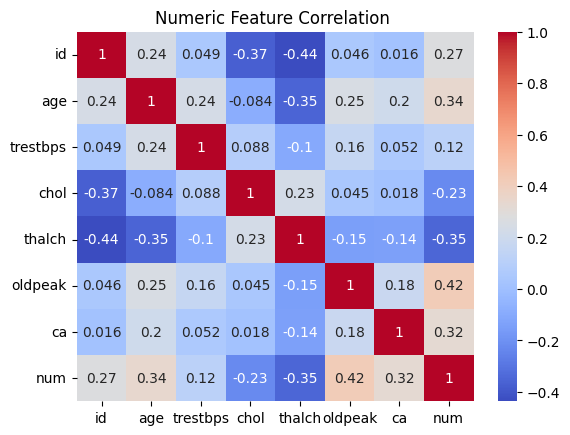

In [9]:
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlation ')
plt.show()

In [10]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
    cat_cols.remove('num')


In [11]:
X = df.drop('num', axis=1)
y = (df['num'] > 0).astype(int)

In [12]:
X = pd.get_dummies(X, columns=cat_cols)
print("Final feature columns:", X.columns)

Final feature columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


Train model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression


In [17]:
lr_model= LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

MOdel Evaluation

In [18]:
from sklearn.metrics import accuracy_score , classification_report

In [19]:
y_pred_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.842391304347826
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



Random forest and feature importance

In [20]:
from sklearn.metrics import confusion_matrix

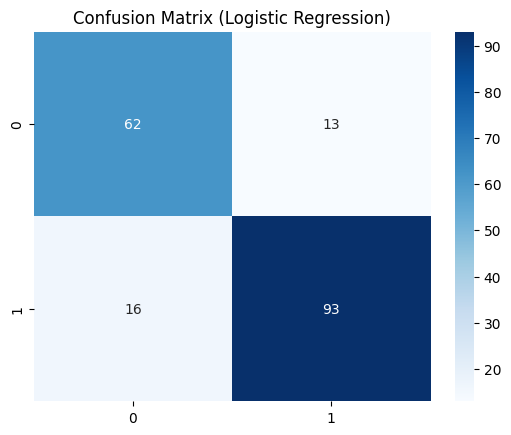

In [21]:
cm= confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.8858695652173914


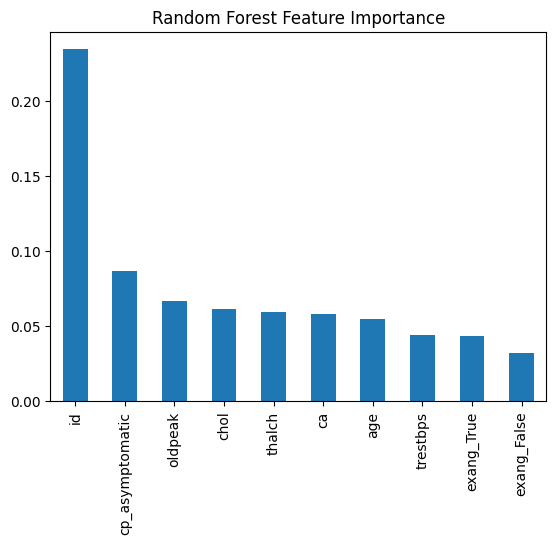

In [24]:
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='bar')
plt.title('Random Forest Feature Importance')
plt.show()

Save the model

In [25]:
import joblib
joblib.dump(rf_model, 'heart_rf_model.pkl')


['heart_rf_model.pkl']

In [26]:
joblib.dump(scaler, 'heart_scaler.pkl')

['heart_scaler.pkl']

In [43]:
sample = X.head(1)
sample.to_csv('Heart_user_template.csv', index=False)
print("User template saved as 'Heart_user_template.csv' ")

User template saved as 'Heart_user_template.csv' 


user upload and prediction

In [45]:
from google.colab import files
files.upload()

Saving Heart_user_template.csv to Heart_user_template (1).csv


{'Heart_user_template (1).csv': b'age,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina\r\n58,130,220,1,normal,150,FALSE,1.4,flat,0,fixed defect,0,1,0,0,0,1\r\n67,160,276,0,lv hypertrophy,108,TRUE,1.5,flat,3,normal,0,1,1,0,0,0\r\n42,120,230,0,normal,170,FALSE,1,upsloping,0,reversable defect,1,0,0,0,1,0\r\n50,130,210,0,lv hypertrophy,158,FALSE,0.8,flat,0,normal,0,1,0,0,1,0\r\n45,114,230,0,normal,165,FALSE,1.1,downsloping,0,normal,1,0,0,1,0,0\r\n'}

In [53]:
import joblib
import pandas as pd


# Get column lists from original training dataframe
numeric_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
bool_cols = df.select_dtypes(include='bool').columns.tolist()

# Drop extra columns
numeric_cols = [col for col in numeric_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_df.columns]

# Fill missing numeric values
user_df[numeric_cols] = user_df[numeric_cols].fillna(user_df[numeric_cols].mean())

# Fill missing categorical values
for col in cat_cols:
    user_df[col] = user_df[col].fillna('unknown')

# Convert boolean columns to int
for col in bool_cols:
    user_df[col] = user_df[col].astype(int)

# One-hot encoding
user_df_encoded = pd.get_dummies(user_df, columns=cat_cols)

# Align columns with training data
user_df_encoded = user_df_encoded.reindex(columns=X.columns, fill_value=0)

# Scale numeric data
scaler = joblib.load('heart_scaler.pkl')
user_df_scaled = scaler.transform(user_df_encoded)

# Load model
model = joblib.load('heart_rf_model.pkl')

# Predictions
preds = model.predict(user_df_scaled)
probs = model.predict_proba(user_df_scaled)[:, 1]  # probability of heart disease (class=1)

# Add results to dataframe
user_df['Heart_disease'] = preds
user_df['Risk_percentage'] = (probs * 100).round(2)  # convert to % and round to 2 decimals

# Show result
display(user_df)


,age,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,Heart_disease,Risk_percentage
0,58,130,220,1,normal,150,False,1.4,flat,0,fixed defect,0,1,0,0,0,1,0,29.0
1,67,160,276,0,lv hypertrophy,108,True,1.5,flat,3,normal,0,1,1,0,0,0,1,85.0
2,42,120,230,0,normal,170,False,1.0,upsloping,0,reversable defect,1,0,0,0,1,0,0,19.0
3,50,130,210,0,lv hypertrophy,158,False,0.8,flat,0,normal,0,1,0,0,1,0,0,17.0
4,45,114,230,0,normal,165,False,1.1,downsloping,0,normal,1,0,0,1,0,0,0,10.0
